# Capstone Project 1 (Regression) Dataset= Life expectancy (WHO)

In [62]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import tree
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Data Defination

Country-There are 193 countries and names are gives of those counties.

Schooling-Schooling column will let us know about the magnitude of education in that country. 

Income composition of resources-It is a Human Development Index between 0 and 1 based on income and availability of resources.

Adult Mortality-The probability that those who have reached age 15 will die before reaching age 60.

Infant deaths-Infant mortality is the death of an infant before his or her first birthday.

Alcohol-Alcohol column tells us about the alcohol consumption more the value more the alcohol consumption.

Percentage expenditure-It is calculated by dividing the total expenditure on an item for a given sub group of households (to calculate, see above) by the total expenditure on the item for all households and then multiplying by 100.

Hepatitis B-Hepatitis B is a potentially life-threatening liver infection caused by the hepatitis B virus (HBV).

Measles-Measles is an acute viral respiratory illness.

BMI-Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m², resulting from mass in kilograms and height in metres.

Under-five deaths-The under-five mortality rate (U5MR) represents children who die before reaching the age of 5 per 1000 live births.

Polio-Polio is an illness caused by a virus that mainly affects nerves in the spinal cord or brain stem.

Total expenditure-The sum of the price paid for one or more products or services multiplied by the amount of each item purchased.

Diphtheria-A serious infection of the nose and throat that's easily preventable by a vaccine.

HIV/AIDS-AIDS is a chronic immune system disease caused by the human immunodeficiency virus.

GDP-Gross domestic product.

Population-Total resident of the country.

Thinness 1-19 years - Fats in the age grp of 1-19.

Thinness 5-9 years-Fats in the age grp of 5-9.

Life expectancy-Target column.

In [2]:
#Load the dataset
df=pd.read_csv("Life _expectancy Data.csv")

In [3]:
#EDA (Head)
df.head()

,Country,Schooling,Status,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Life expectancy
0,Afghanistan,10.1,Developing,0.479,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,65.0
1,Afghanistan,10.0,Developing,0.476,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,59.9
2,Afghanistan,9.9,Developing,0.470,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,59.9
3,Afghanistan,9.8,Developing,0.463,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,59.5
4,Afghanistan,9.5,Developing,0.454,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,59.2


Conclusion=The dataset has been loaded properly in terms of col name and overall structure.We need to delete county name col because it is not goung to help in prediction.

In [4]:
#Delete unwanted cols
del df["Country"]

In [5]:
#EDA (Tail)
df.tail()

,Schooling,Status,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Life expectancy
2933,9.2,Developing,0.407,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,44.3
2934,9.5,Developing,0.418,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,44.5
2935,10.0,Developing,0.427,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,44.8
2936,9.8,Developing,0.427,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,45.3
2937,9.8,Developing,0.434,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,46.0


Conclusion=The unwanted cols are been deleted.

In [6]:
#EDA (Shape)
df.shape

(2938, 20)

Conclusion=There are 20 cols and 2938 rows.

In [7]:
#EDA (Cols)
df.columns

Index(['Schooling', 'Status', 'Income composition of resources',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy '],
      dtype='object')

In [8]:
#EDA (Size)
df.size

58760

Concsluion=There are 58760 data pts.

In [9]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        2775 non-null   float64
 1   Status                           2938 non-null   object 
 2   Income composition of resources  2771 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

Cocnluion=There are missing values and there is no need of change of any dtype because the dtype and the data matches.

In [10]:
#EDA (Duplicate rows)
df.duplicated().sum()

0

Cocnluion=There are no duplicated values.

In [11]:
#EDA (Describe)
df.describe()

,Schooling,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Life expectancy
count,2775.000000,2771.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2928.000000
mean,11.992793,0.627551,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,69.224932
std,3.358920,0.210904,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,9.523867
min,0.000000,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,36.300000
25%,10.100000,0.493000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,63.100000
50%,12.300000,0.677000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,72.100000
75%,14.300000,0.779000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,75.700000
max,20.700000,0.948000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,89.000000


Concluion=There seems to be lot of difference between median and mean hence the data seems to be skewed.

In [12]:
#EDA (Skewness)
df.skew()

Schooling                          -0.602437
Income composition of resources    -1.143763
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Life expectancy                    -0.638605
dtype: float64

Conclusion=The data is mostly left and right skewed but very less except for Population,Infant death and percentage expenditure.

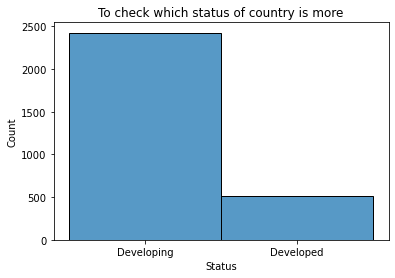

In [13]:
#Data visluization (Cat col)
sns.histplot(data=df["Status"])
plt.title("To check which status of country is more");

Concluion=Most of the countries in this list are developing countries.

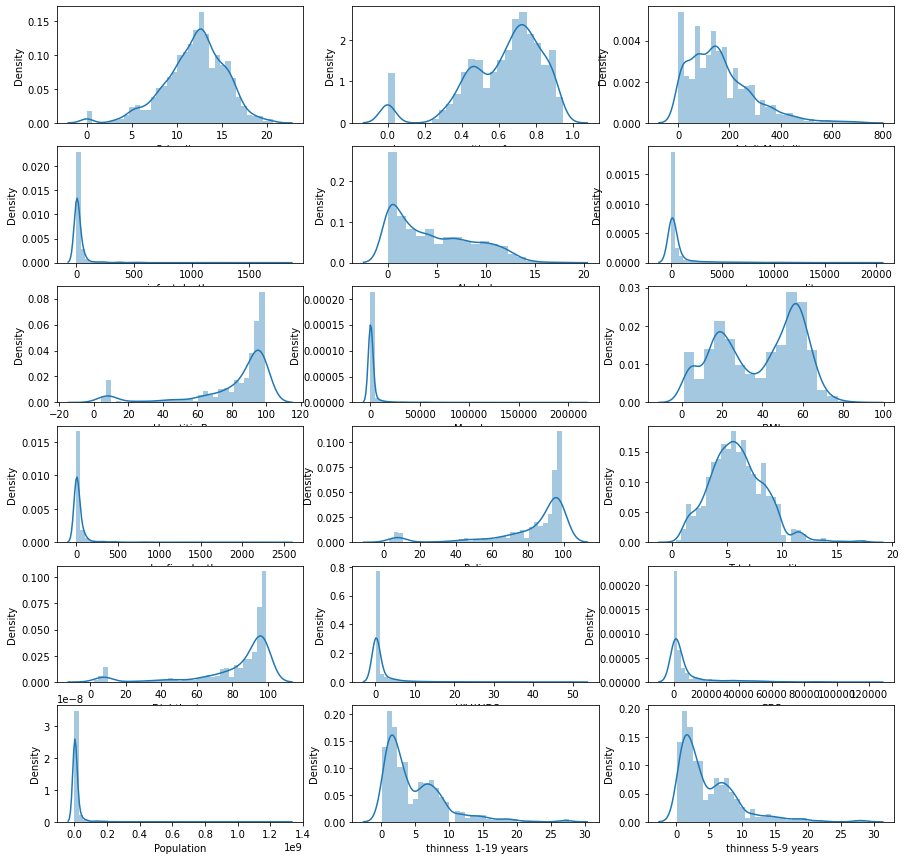

In [14]:
#Data visulization (Numeric col)
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=6,ncols=3,figsize=[15,15])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.distplot(df[col],ax=sub)

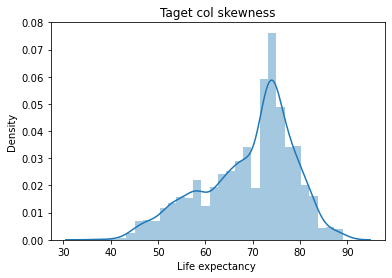

In [15]:
#Data visluization (Taget col)
sns.distplot(df["Life expectancy "])
plt.title("Taget col skewness");

Conclsuion=The target col seems to be left skewed.

In [16]:
#EDA (Corr)
df.corr()

,Schooling,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Life expectancy
Schooling,1.000000,0.800092,-0.454612,-0.193720,0.547378,0.389687,0.231117,-0.137225,0.546961,-0.209373,0.417866,0.246384,0.425332,-0.220429,0.448273,-0.031668,-0.471652,-0.460632,0.751975
Income composition of resources,0.800092,1.000000,-0.457626,-0.145139,0.450040,0.381952,0.199549,-0.129568,0.508774,-0.163305,0.381078,0.166682,0.401456,-0.249519,0.460341,-0.008735,-0.422429,-0.411053,0.724776
Adult Mortality,-0.454612,-0.457626,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.696359
infant deaths,-0.193720,-0.145139,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.196557
Alcohol,0.547378,0.450040,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.404877
percentage expenditure,0.389687,0.381952,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381864
Hepatitis B,0.231117,0.199549,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.256762
Measles,-0.137225,-0.129568,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.157586
BMI,0.546961,0.508774,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.567694
under-five deaths,-0.209373,-0.163305,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.222529


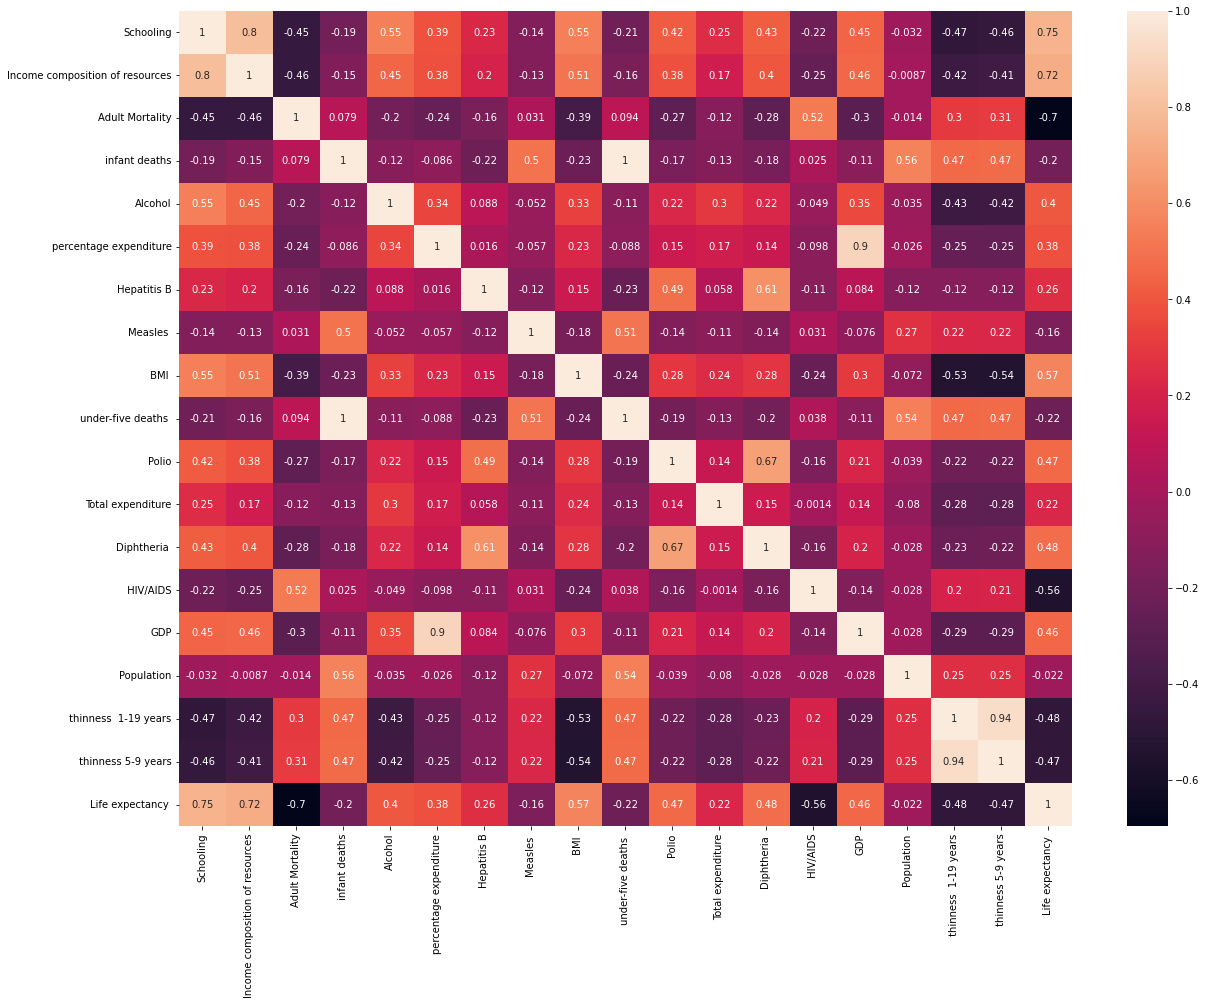

In [17]:
#EDA (Heat map of corr)
plt.rcParams["figure.figsize"]=[20,15]
sns.heatmap(df.corr(),annot=True);

Concluion=The target col has highest corr with schooling and income composition.

In [18]:
#Missing values
df.isnull().sum()

Schooling                          163
Status                               0
Income composition of resources    167
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Life expectancy                     10
dtype: int64

There are missing values and we need to fill them (But not for the target col).

In [19]:
#Treatmnt of missing values for the target col
df=df.dropna(subset=["Life expectancy "])

In [20]:
#Treatment of missing values for other cols
for col in df_numeric.columns:
    df[col]=df[col].fillna(df[col].mean())

In [21]:
#Check of misiing values
df.isnull().sum()

Schooling                          0
Status                             0
Income composition of resources    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Life expectancy                    0
dtype: int64

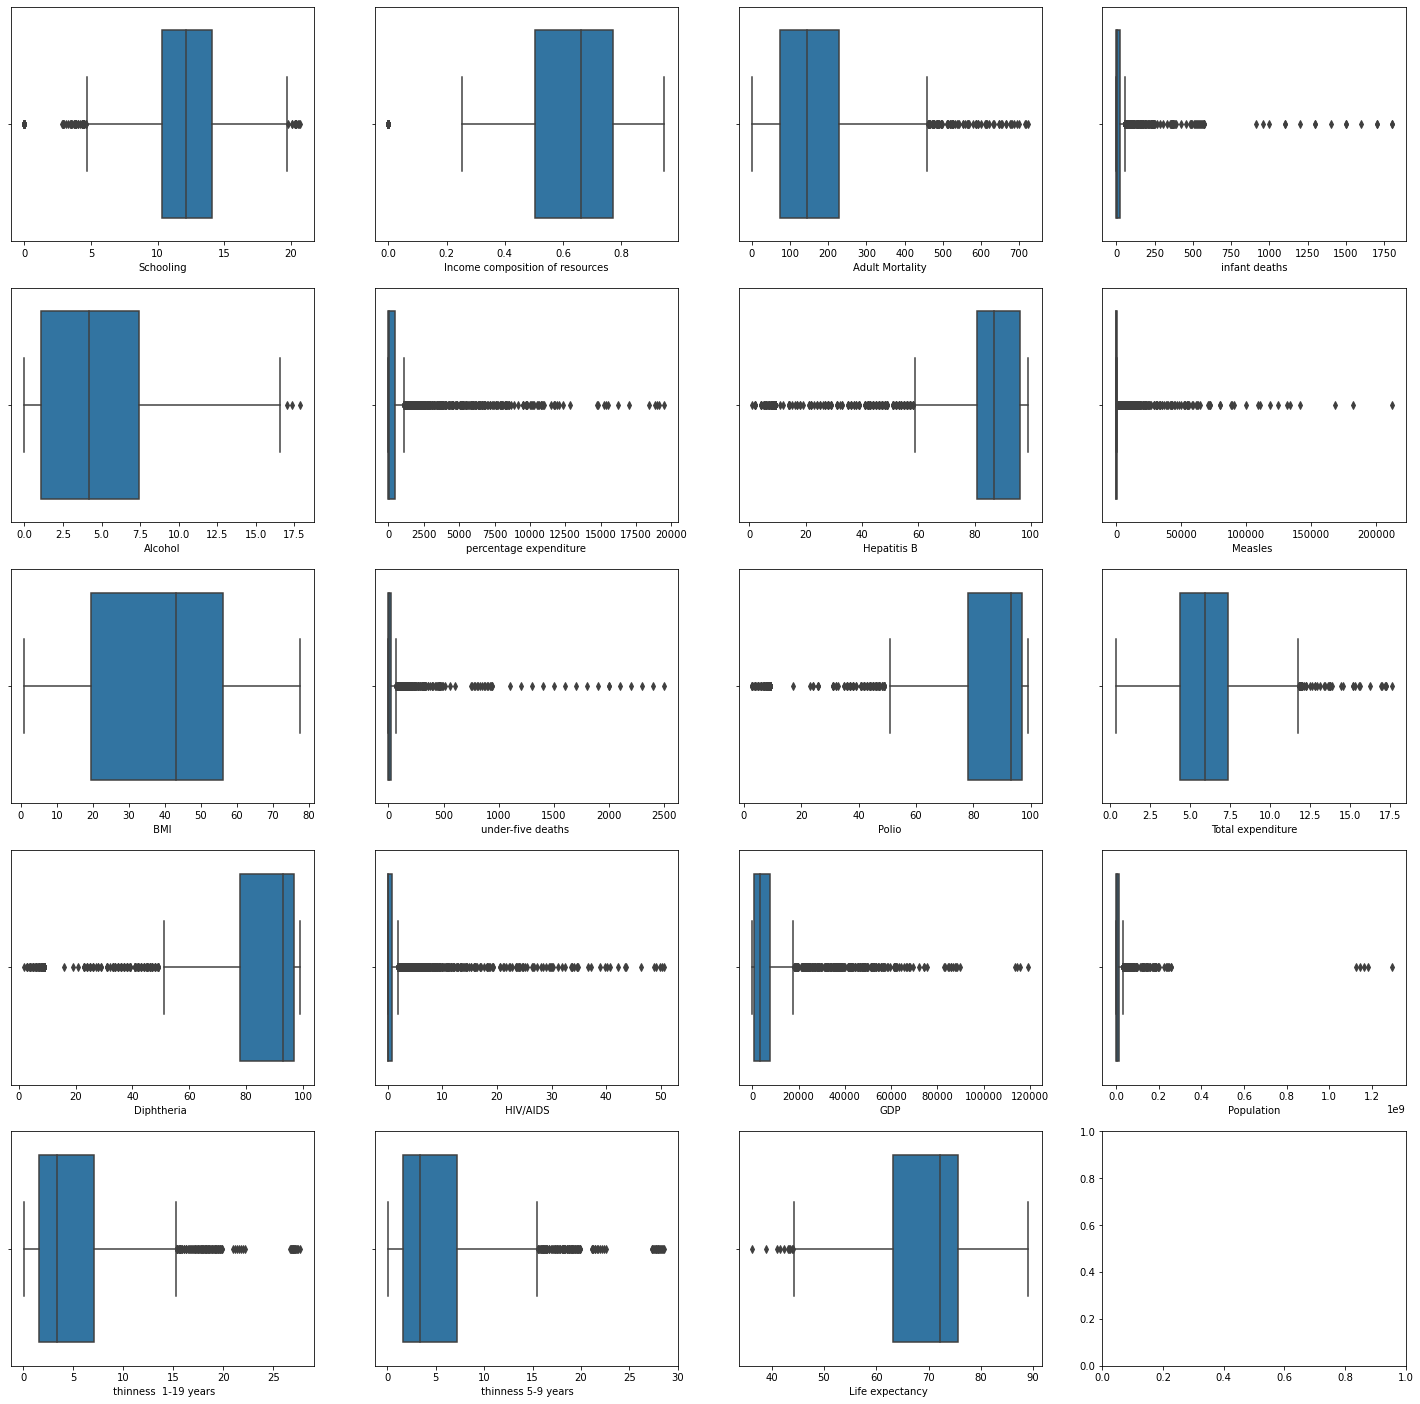

In [22]:
#Outliers detection
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

Concluion=There are many outliers and we need to treat them.

In [23]:
#Treattment of outliers
#Schooling
q1=df["Schooling"].quantile(0.25)
q3=df["Schooling"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Schooling"]=np.where(df["Schooling"]>mx,mx,df["Schooling"])
df["Schooling"]=np.where(df["Schooling"]<mn,mn,df["Schooling"])
#Income composition of resources
q1=df["Income composition of resources"].quantile(0.25)
q3=df["Income composition of resources"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Income composition of resources"]=np.where(df["Income composition of resources"]<mn,mn,df["Income composition of resources"])
#Adult mortality
q1=df["Adult Mortality"].quantile(0.25)
q3=df["Adult Mortality"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Adult Mortality"]=np.where(df["Adult Mortality"]>mx,mx,df["Adult Mortality"])
#Infant death
q1=df["infant deaths"].quantile(0.25)
q3=df["infant deaths"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["infant deaths"]=np.where(df["infant deaths"]>mx,mx,df["infant deaths"])
#Alcohol
q1=df["Alcohol"].quantile(0.25)
q3=df["Alcohol"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Alcohol"]=np.where(df["Alcohol"]>mx,mx,df["Alcohol"])
#Percentage expenditure
q1=df["percentage expenditure"].quantile(0.25)
q3=df["percentage expenditure"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["percentage expenditure"]=np.where(df["percentage expenditure"]>mx,mx,df["percentage expenditure"])
#Hepatitis B
q1=df["Hepatitis B"].quantile(0.25)
q3=df["Hepatitis B"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Hepatitis B"]=np.where(df["Hepatitis B"]<mn,mn,df["Hepatitis B"])
#Measles
q1=df["Measles "].quantile(0.25)
q3=df["Measles "].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Measles "]=np.where(df["Measles "]>mx,mx,df["Measles "])
#under-five deaths
q1=df["under-five deaths "].quantile(0.25)
q3=df["under-five deaths "].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["under-five deaths "]=np.where(df["under-five deaths "]>mx,mx,df["under-five deaths "])
#Polio
q1=df["Polio"].quantile(0.25)
q3=df["Polio"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Polio"]=np.where(df["Polio"]<mn,mn,df["Polio"])
#Total expenditure
q1=df["Total expenditure"].quantile(0.25)
q3=df["Total expenditure"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Total expenditure"]=np.where(df["Total expenditure"]<mn,mn,df["Total expenditure"])
#Diphtheria
q1=df["Diphtheria "].quantile(0.25)
q3=df["Diphtheria "].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Diphtheria "]=np.where(df["Diphtheria "]<mn,mn,df["Diphtheria "])
#HIV/AID
q1=df[" HIV/AIDS"].quantile(0.25)
q3=df[" HIV/AIDS"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df[" HIV/AIDS"]=np.where(df[" HIV/AIDS"]>mx,mx,df[" HIV/AIDS"])
#GDP
q1=df["GDP"].quantile(0.25)
q3=df["GDP"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["GDP"]=np.where(df["GDP"]>mx,mx,df["GDP"])
#Population
q1=df["Population"].quantile(0.25)
q3=df["Population"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df["Population"]=np.where(df["Population"]>mx,mx,df["Population"])
#Thickness 5-9 years
q1=df[" thinness 5-9 years"].quantile(0.25)
q3=df[" thinness 5-9 years"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df[" thinness 5-9 years"]=np.where(df[" thinness 5-9 years"]>mx,mx,df[" thinness 5-9 years"])
#Thickness 1-19 years
q1=df[" thinness  1-19 years"].quantile(0.25)
q3=df[" thinness  1-19 years"].quantile(0.75)
iqr=q3-q1
mx=q3+(1.5*iqr)
mn=q1-(1.5*iqr)
df[" thinness  1-19 years"]=np.where(df[" thinness  1-19 years"]>mx,mx,df[" thinness  1-19 years"])

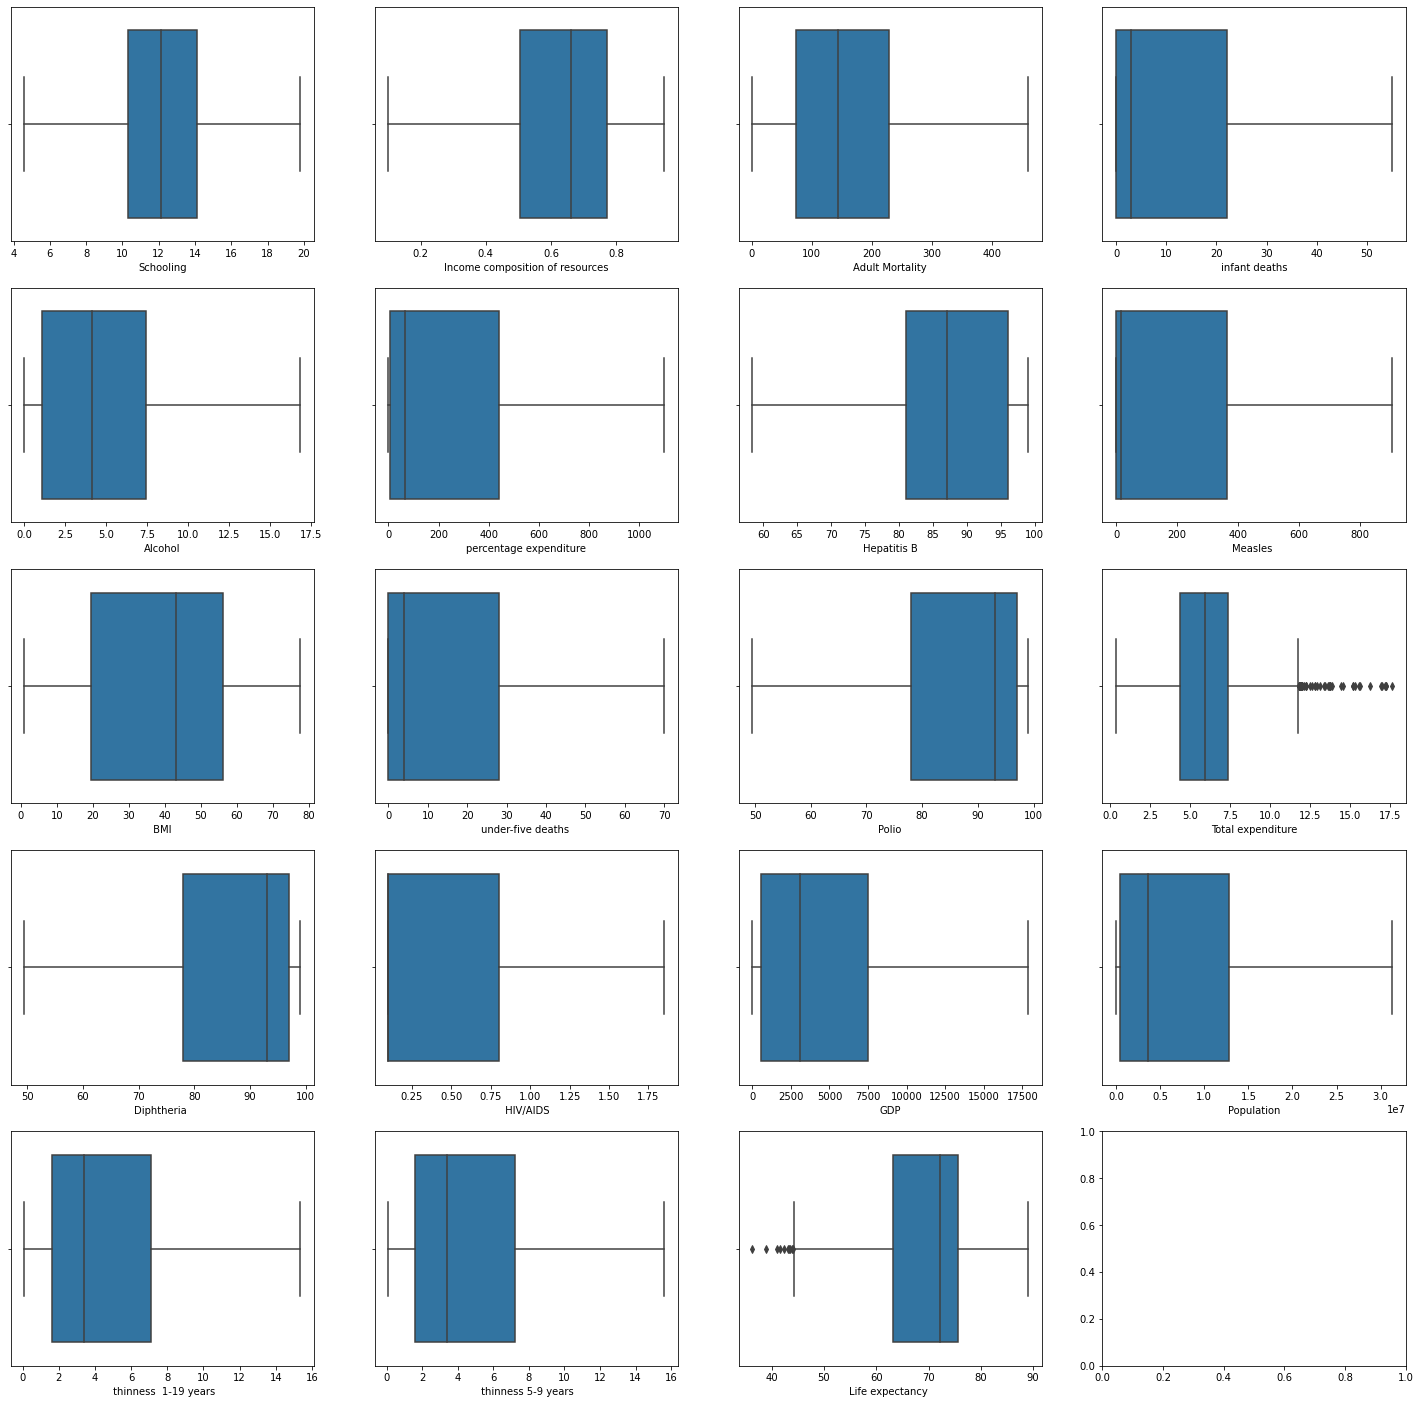

In [24]:
#Outliers detection
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

Cocnluion=The outliers have gone.

In [25]:
#Traetment of cat col
df=pd.get_dummies(df,drop_first=True)
df.head()

,Schooling,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Life expectancy,Status_Developing
0,10.1,0.479,263.0,55.0,0.01,71.279624,65.0,905.625,19.1,70.0,49.5,8.16,65.0,0.1,584.259210,3.128417e+07,15.35,15.6,65.0,1
1,10.0,0.476,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,59.9,1
2,9.9,0.470,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,62.0,8.13,64.0,0.1,631.744976,3.128417e+07,15.35,15.6,59.9,1
3,9.8,0.463,272.0,55.0,0.01,78.184215,67.0,905.625,17.6,70.0,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.35,15.6,59.5,1
4,9.5,0.454,275.0,55.0,0.01,7.097109,68.0,905.625,17.2,70.0,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.35,15.6,59.2,1


In [26]:
#Data standardization
X=df.drop("Life expectancy ",axis=1)
y=df["Life expectancy "]
ss=StandardScaler()
ScaledX=ss.fit_transform(X)
ScaledX

array([[-0.62864693, -0.79593539,  0.8710856 , ...,  2.70554083,
         2.73429363,  0.46034827],
       [-0.660924  , -0.81155414,  0.94014226, ...,  2.70554083,
         2.73429363,  0.46034827],
       [-0.69320107, -0.84279162,  0.91424602, ...,  2.70554083,
         2.73429363,  0.46034827],
       ...,
       [-0.660924  , -1.06666029, -0.76901005, ..., -0.89446928,
        -0.86436693,  0.46034827],
       [-0.72547814, -1.06666029,  2.56297375, ..., -0.79270221,
        -0.7637051 ,  0.46034827],
       [-0.72547814, -1.03021655,  2.56297375, ...,  1.59882394,
         1.62701345,  0.46034827]])

In [27]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(ScaledX,y,train_size=0.7,random_state=42)

# Multiple Regression

In [28]:
#Algoritm
MR=LinearRegression()
#Fit
MR.fit(X_train,y_train)

LinearRegression()

In [29]:
#Training and testing score
print("Training score is",MR.score(X_train,y_train))
print("Testing score is",MR.score(X_test,y_test))

Training score is 0.8513637008120423
Testing score is 0.8581126079942634


In [30]:
#r2 score
predict_MR=MR.predict(X_test)
print("r2 score is",r2_score(y_test,predict_MR))

r2 score is 0.8581126079942634


Concluion=The r2 score is good enough.

# KNN

In [31]:
#Algorith
KNN=KNeighborsRegressor()
#fit
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [32]:
#Training and testing score
print("Training score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Training score is 0.936510152932354
Testing score is 0.913087271863986


Concluion=As expected the traing and testing score for KNN is very good not not of any use.

In [33]:
#r2 score
predict_KNN=KNN.predict(X_test)
print("r2 score is",r2_score(y_test,predict_KNN))

r2 score is 0.913087271863986


Conclusion=Excellent r2 score but not of use.

# SVM

In [34]:
#Algoritm
SVM=SVR()
#Fit
SVM.fit(X_train,y_train)

SVR()

In [35]:
#Training and testing score
print("Training score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Training score is 0.8830891709303101
Testing score is 0.8856348959623273


Concluion=The traing and testing score is good.

In [36]:
#r2 score
predict_SVM=SVM.predict(X_test)
print("r2 score is",r2_score(y_test,predict_SVM))

r2 score is 0.8856348959623273


Concluion=Very good r2 value.

# Decison Tree

In [37]:
#Algoritm
DT=DecisionTreeRegressor()
#Fit
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:
#Traning and testing score
print("Training score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Training score is 1.0
Testing score is 0.9159786567217503


Concluion=The traning and testing score are very good.

In [39]:
#r2 score
predict_DT=DT.predict(X_test)
print("r2 score is",r2_score(y_test,predict_DT))

r2 score is 0.9159786567217503


Conclusion=r2 Value is highest.

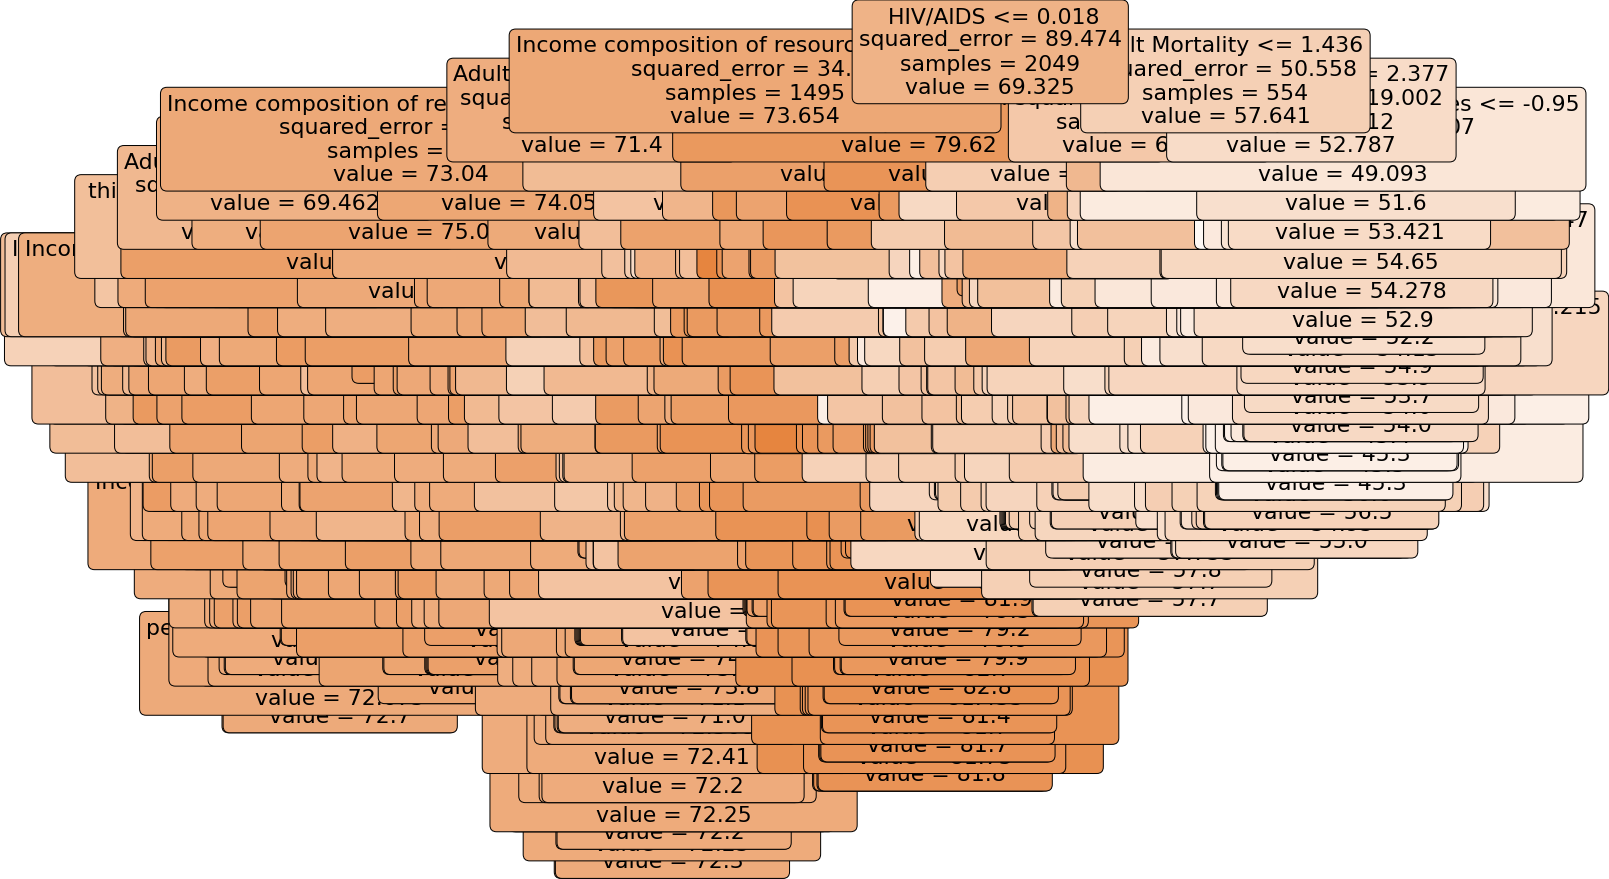

In [40]:
#Tree
tree.plot_tree(DT,feature_names=X.columns,filled=True,rounded=True,fontsize=22);

Conclusion=The tree is very vast and we are not able to make any desecion from it and hence pruning must be done.

In [41]:
#Hyperpametric Tunning
#Hyper para
hyperpara=dict(criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"],max_depth=list(range(1,100)),min_samples_split=list(range(1,100)),min_samples_leaf=list(range(1,100)))
#Grid search
random=RandomizedSearchCV(estimator=DT,param_distributions=hyperpara,cv=10)
#Fit
random.fit(X_train,y_train)
#Best estimatot
random.best_estimator_

DecisionTreeRegressor(max_depth=86, min_samples_leaf=14, min_samples_split=83)

In [42]:
#DT after pruning
#Algoritm
DT_P=DecisionTreeRegressor(criterion='absolute_error', max_depth=21, min_samples_leaf=19, min_samples_split=33)
#fit
DT_P.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=21,
                      min_samples_leaf=19, min_samples_split=33)

In [43]:
#Traning and testing score
print("Training score is",DT_P.score(X_train,y_train))
print("Testing score is",DT_P.score(X_test,y_test))

Training score is 0.9295958283005861
Testing score is 0.9142026532987019


Concluion=The traning has reduced but good enough.

In [44]:
#r2 score
predict_DT=DT_P.predict(X_test)
print("r2 score is",r2_score(y_test,predict_DT))

r2 score is 0.9142026532987019


Conclusion=r2 value has been increased.

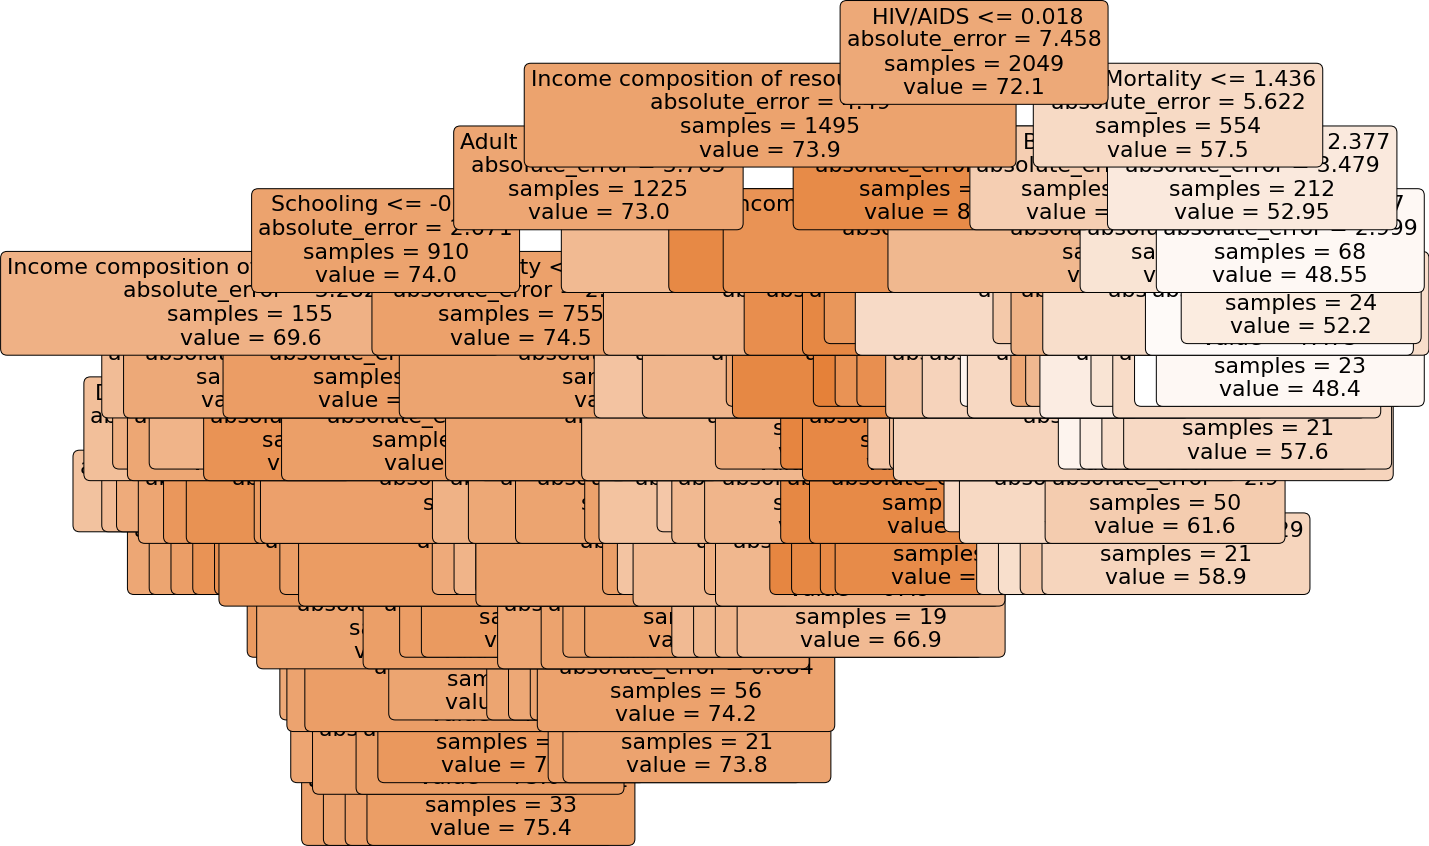

In [45]:
#Tree
tree.plot_tree(DT_P,feature_names=X.columns,filled=True,rounded=True,fontsize=22);

Concluion=still visulization is not clear. We need to apply ensemble techniques

# Ensemble Techniques

1) Bagging Regressor

2) ExtraTrees Regression 

3) Adaboost

4) Gradient Boosting

5) XgBoosting


## ExtraTrees Regression

In [59]:
#Algoritm
ET=ExtraTreesRegressor()
#Fit
ET.fit(X_train,y_train)

ExtraTreesRegressor()

In [60]:
#Traning and testing score
print("Training score is",BR.score(X_train,y_train))
print("Testing score is",BR.score(X_test,y_test))

Training score is 0.9897716418204867
Testing score is 0.9553091318930739


Conclusion=Very good traning and testing.

In [61]:
#r2 score
predict_BR=BR.predict(X_test)
print("r2 score is",r2_score(y_test,predict_BR))

r2 score is 0.9553091318930739


Conclusion=We have very good r2 score.

## Bagging Regressor

In [55]:
#Algoritm
BR=BaggingRegressor()
#Fit
BR.fit(X_train,y_train)

BaggingRegressor()

In [56]:
#Traning and testing score
print("Training score is",BR.score(X_train,y_train))
print("Testing score is",BR.score(X_test,y_test))

Training score is 0.9897716418204867
Testing score is 0.9553091318930739


Conclusion=The Traning and testing both are very good.

In [58]:
#r2 score
predict_BR=BR.predict(X_test)
print("r2 score is",r2_score(y_test,predict_BR))

r2 score is 0.9553091318930739


Conclsion=We are very good r2 score.

## Adaboost

In [63]:
#Algorithm
AD=AdaBoostRegressor()
#Fit
AD.fit(X_train,y_train)

AdaBoostRegressor()

In [64]:
#Traning and testing score
print("Training score is",AD.score(X_train,y_train))
print("Testing score is",AD.score(X_test,y_test))

Training score is 0.9002033939810438
Testing score is 0.8942998485372627


In [65]:
#r2 score
predict_AD=AD.predict(X_test)
print("r2 score is",r2_score(y_test,predict_AD))

r2 score is 0.8942998485372627


Conclusion=As compared to other ensemble techniques we have less r2 score.

## Gradient Boosting

In [66]:
#Algorithm
GB=GradientBoostingRegressor()
#Fit
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [67]:
#Traning and testing score
print("Training score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Training score is 0.957530295102421
Testing score is 0.9404136505293409


Conclusion=Low bias and low varirance.

In [68]:
#r2 score
predict_GB =GB.predict(X_test)
print("r2 score is",r2_score(y_test,predict_GB))

r2 score is 0.9404136505293409


Conclusion=Good r2 score.

## Xgboost

In [50]:
#Algorithm
XB=XGBRegressor(random_state=42,learning_rate=0.1)
#Fit
XB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [52]:
#Traning and testing score
print("Training score is",XB.score(X_train,y_train))
print("Testing score is",XB.score(X_test,y_test))

Training score is 0.9917518668376926
Testing score is 0.9575588665902822


Conclusion=Very good traning and very good testing.

In [53]:
#r2 score
predict_XB=XB.predict(X_test)
print("r2 score is",r2_score(y_test,predict_XB))

r2 score is 0.9575588665902822


Conclusion=Very good r2 score.

# Result

In [80]:
result=pd.DataFrame({"Algorithm":["Multiple Regression","KNN","SVM","DT","DT after hyperparametric Tunning","Bagging Regressor","Extra Trees Regressor","Adaboost Regressor","Gradient Boosting","XgBoost"],"Traning Score":[0.85,0.93,0.88,1,0.92,0.98,0.98,0.90,0.95,0.99],"Testing Score":[0.85,0.91,0.88,0.91,0.91,0.955,0.955,0.89,0.94,0.95],"r2 value":[0.85,0.913,0.88,0.91,0.91,0.955,0.955,0.89,0.94,0.957]},index=list(range(1,11)))
result

,Algorithm,Traning Score,Testing Score,r2 value
1,Multiple Regression,0.85,0.850,0.850
2,KNN,0.93,0.910,0.913
3,SVM,0.88,0.880,0.880
4,DT,1.00,0.910,0.910
5,DT after hyperparametric Tunning,0.92,0.910,0.910
6,Bagging Regressor,0.98,0.955,0.955
7,Extra Trees Regressor,0.98,0.955,0.955
8,Adaboost Regressor,0.90,0.890,0.890
9,Gradient Boosting,0.95,0.940,0.940
10,XgBoost,0.99,0.950,0.957


Conclusion= XgBoost has the highest r2 score which is the best performance parameter in case of regression.

Hence XgBoost will be choosen for further regressions.

# Predictions

In [97]:
#Actual value and the predicted value
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value': XB.predict(X_test)})
prediction["Percentage error"]=(prediction["Actual value"]-prediction["Predicted value"])/prediction["Predicted value"]

In [100]:
prediction.head(10)

,Actual value,Predicted value,Percentage error
2399,56.5,53.877747,0.048670
196,73.0,70.913506,0.029423
2316,82.5,81.858452,0.007837
1735,75.6,76.198807,-0.007858
1102,53.0,52.716797,0.005372
1194,65.2,65.668610,-0.007136
1507,72.4,73.308167,-0.012388
1161,74.1,73.859474,0.003257
322,77.0,75.604187,0.018462
1352,67.8,68.277275,-0.006990


# Visulization of actual and predicted values

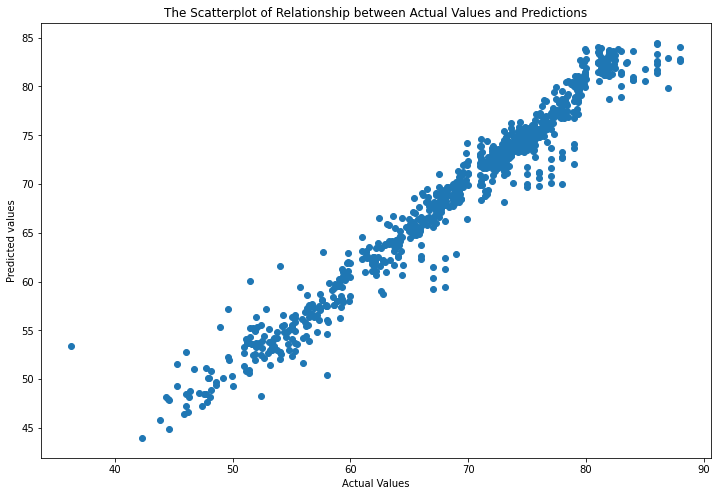

In [89]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(prediction['Actual value'], prediction['Predicted value']);

# Thank You